#  Plot DEGs

In [1]:
library(dplyr)
library(reshape2)
library(plyr)
library(RColorBrewer)
library(ggplot2)
library(pheatmap)
library(cowplot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




In [2]:
# cellphoneDB = read.delim('data/cellphoneDB/out/deconvoluted.txt', stringsAsFactors = F)
# head(cellphoneDB)

## Load DEGs

In [3]:
DE_gland = read.csv('data/spatial/DEGs/epi_glandular_vs_epi_rest_limma_DEGs_20200423.csv', stringsAsFactors = F)
DE_luminal = read.csv('data/spatial/DEGs/epi_luminal_vs_epi_rest_limma_DEGs_20200423.csv', stringsAsFactors = F)
DE_basal = read.csv('data/spatial/DEGs/epi_basal_vs_epi_rest_limma_DEGs_20200423.csv', stringsAsFactors = F)

DE = list(gland=DE_gland,
         luminal=DE_luminal,
         basal=DE_basal)

DE = lapply(DE, function(x){
    x = x[ order(x$logFC, decreasing = T) ,]
    x$rank = 1:nrow(x)
    return(x)
})

## Plot top DEGs

In [4]:
DE_df = melt(DE, id.vars = names(DE[[1]]) )
head(DE_df)

,Gene,logFC,P.Value,adj.P.Val,AveExpr_cluster,AveExpr_rest,percentExpr_cluster,percentExpr_rest,rank,L1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,DYNLT3,0.6123489,1.465375e-28,1.397015e-24,1.746171,1.133822,0.985849,0.890625,1,gland
2,S100P,0.5577162,1.763140e-22,4.202224e-19,0.856014,0.298298,0.811321,0.385417,2,gland
3,KLF6,0.5340049,2.226918e-23,6.065806e-20,1.902876,1.368871,0.995283,0.947917,3,gland
4,PLA2G16,0.5058888,4.250682e-22,9.005306e-19,1.138781,0.632892,0.948113,0.635417,4,gland
5,SGK1,0.5001036,1.208001e-24,5.758238e-21,2.511878,2.011775,1.000000,0.973958,5,gland
6,ELF3,0.4997567,1.818664e-20,2.889706e-17,1.848547,1.348791,0.990566,0.906250,6,gland


In [5]:
# Select top 10 ranked genes
top10 = subset(DE_df, rank %in% 1:20)$Gene #%>% unique(.)
top10

[1] "DYNLT3"   "S100P"    "KLF6"     "PLA2G16"  "SGK1"     "ELF3"    
 [7] "UCA1"     "ACE"      "C2CD4A"   "C2CD4B"   "TUBA1A"   "SERINC2" 
[13] "MFSD4A"   "RASD1"    "ANXA2"    "DEPP1"    "FTH1"     "AQP3"    
[19] "CLDN4"    "FAM84B"   "MT1G"     "SPP1"     "APCDD1"   "GPX3"    
[25] "MT1E"     "PTGS1"    "VCAN"     "COL3A1"   "IGFBP2"   "ADAMTS9" 
[31] "SLC30A2"  "MUC16"    "MT2A"     "MMP11"    "MT1F"     "LAMB3"   
[37] "MT-ND5"   "CD248"    "ISLR"     "MT-ATP6"  "CLU"      "SLC40A1" 
[43] "NNMT"     "SCGB2A2"  "C3"       "SMIM37"   "PIGR"     "C4BPA"   
[49] "SCGB1D4"  "LTF"      "SOX9"     "STC1"     "PABPC1"   "CD59"    
[55] "ATOH8"    "SOD2"     "GPX3"     "MUC6"     "SERPINA1" "SLPI"

In [6]:
# build matrix of top DEGs to plot
DE_df$value =  DE_df$logFC
x = acast(subset(DE_df, Gene %in% top10), Gene~L1, fill = 0)
pheatmap(t(x[top10, names(DE)]), cellheight = 10, cellwidth = 10, cluster_rows = F, cluster_cols = F, 
         color = colorRampPalette(c(brewer.pal(n = 5, name = 'Blues')[4], "white", brewer.pal(n = 5, name = 'Reds')[4]))(50),
        filename = 'data/spatial/DEGs/top20_DEGs.pdf')


In [7]:
genes2plot = c('PTGS1', 'LGR5', 'WNT5A', 'TPPP3', 'FOXJ1', 'KLF6', 'SCGB2A1', 'PAEP', 'AXIN1', 'NOTCH2', 'CLU', 'SOX9', 'STC1', 'CD74', 'MUC5B')

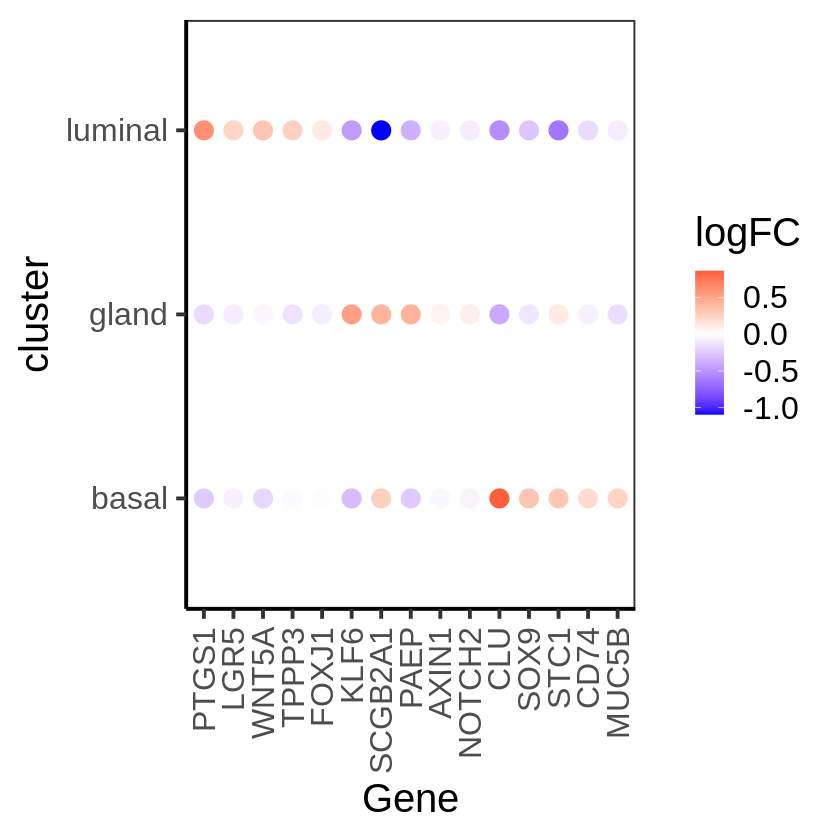

In [8]:
mydf = subset(DE_df, Gene %in% genes2plot)
mydf$Gene = factor(mydf$Gene, levels = genes2plot)
mydf$cluster = factor(mydf$L1, levels = rev(c('luminal', 'gland', 'basal')) )

require(ggplot2)
  ggplot(mydf, 
         aes(x = Gene,
             y = cluster)) +        ## global aes
#   geom_tile(aes(fill = P.Value)) +         ## to get the rect filled
  geom_point(aes(colour = logFC), size = 5)  +    ## geom_point for circle illusion
  scale_color_gradient2(low = "blue",   mid = 'white',
                       high = "red")+       ## color of the corresponding aes
  scale_size(range = c(1, 4))+             ## to tune the size of circles
  theme_bw(24) +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"),
          axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))
ggsave(filename = 'data/spatial/DEGs/dotplot_markergenes.pdf', dpi = 300, width = 10, height = 3)

x = acast(mydf, Gene~L1, fill = 0)
pheatmap(t(x[, c('luminal', 'gland', 'basal') ]), cellheight = 12, cellwidth = 12, cluster_rows = F, cluster_cols = F, 
         color = colorRampPalette(c(brewer.pal(n = 5, name = 'Blues')[4], "white", brewer.pal(n = 5, name = 'Reds')[4]))(50),
        filename = 'data/spatial/DEGs/heatmap_markers.pdf')